In [120]:
import glossary_eval
import imp
imp.reload(glossary_eval)
from scipy.stats import ttest_ind, pearsonr
import matplotlib.pyplot as plt
import os
import csv
from collections import defaultdict, Counter
import tqdm
import numpy as np
import matplotlib as mpl
from scipy.stats import mannwhitneyu
mpl.rcParams['figure.dpi'] = 300
import pandas as pd

In [121]:
ROOT = '/mnt/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
SENSE_PMI_DIR = LOG_DIR + 'finetuned_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_sense_pmi/'
DN_SENSE_PMI_DIR = LOG_DIR + 'denoised_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'
TFIDF_DIR = LOG_DIR + 'tfidf/'

## Finetuned Sense PMI

In [138]:
'''
sr2terms = glossary_eval.get_sr2terms()

gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

print(len(gloss_vals))
print(len(not_gloss_vals))

print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability density', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            score = max(w2score[w])
            #if w in gloss_terms and score < 3.00:
            #    print(subreddit, w, score)
            if w not in gloss_terms and score > 4.00: 
                print(subreddit, w, score)
'''
pass

## Base Sense PMI

In [133]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

100%|██████████| 474/474 [00:05<00:00, 88.45it/s] 


In [134]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

Ttest_indResult(statistic=44.845193699421436, pvalue=0.0)
MannwhitneyuResult(statistic=125866556.5, pvalue=2.028451207806043e-192)
2.2033353420545043
0.5455516114294339


Text(0.5, 0, 'max sense pmi')

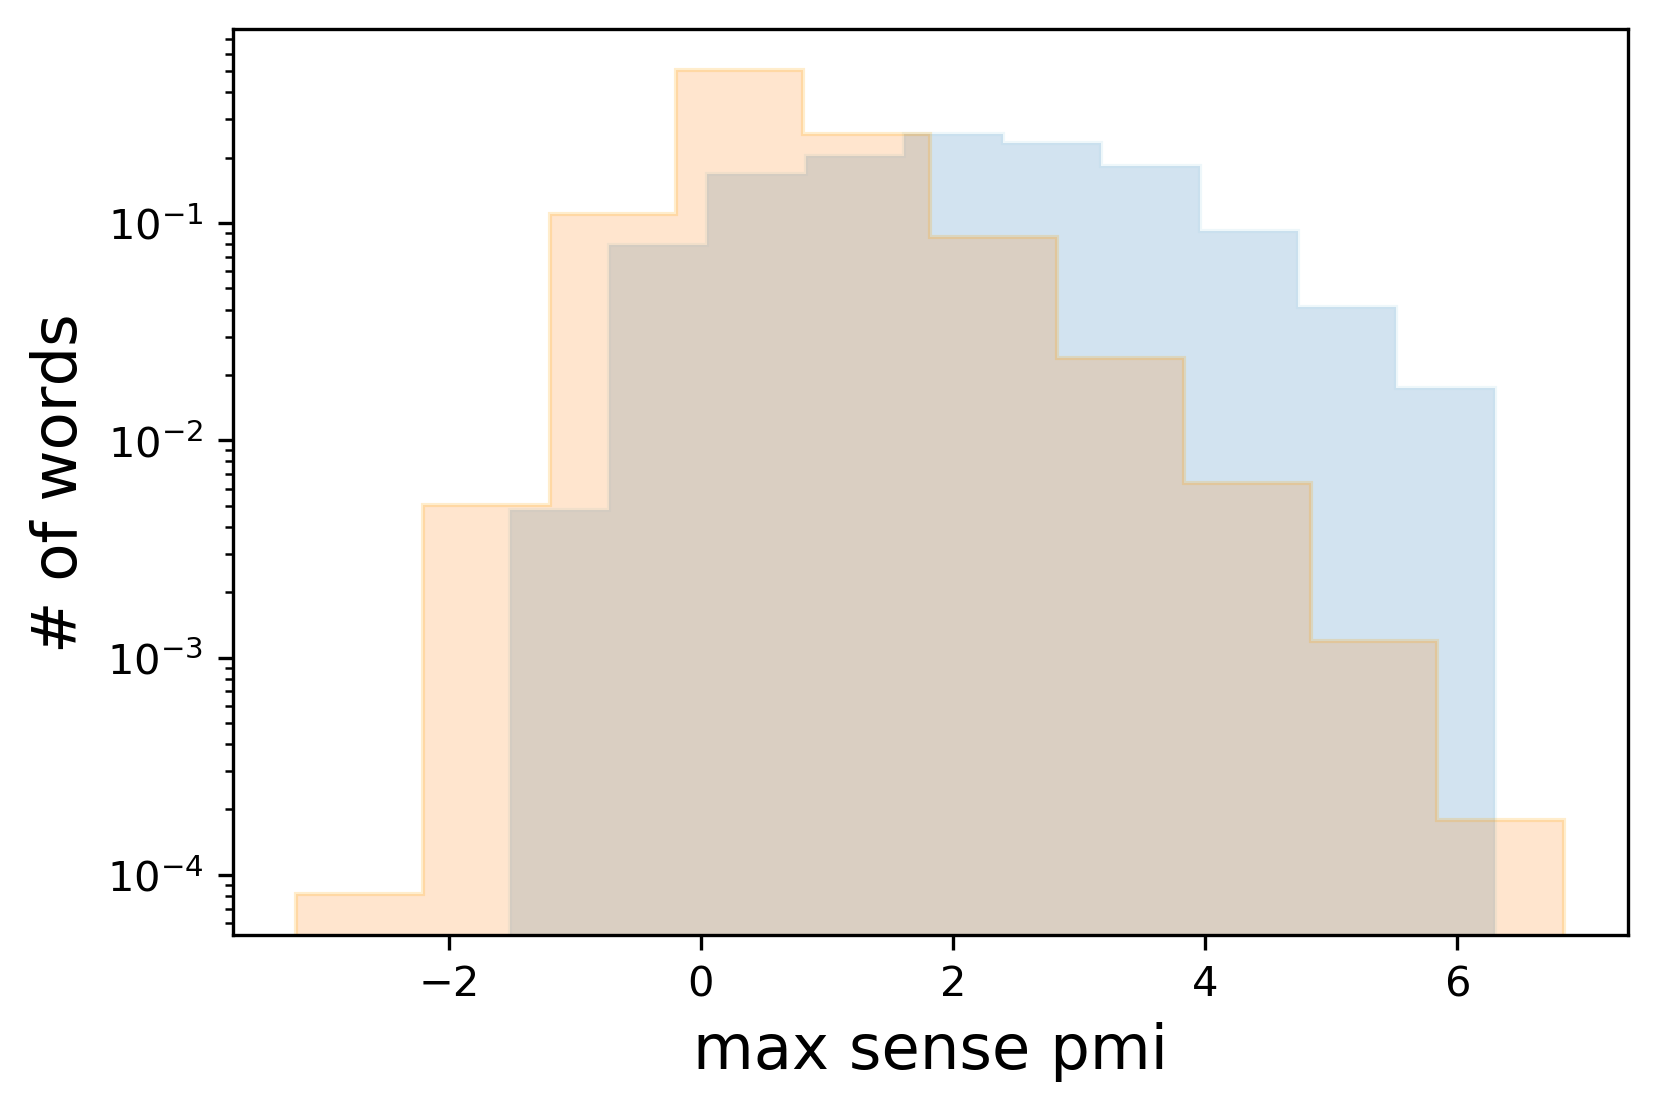

In [135]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

### Sense PMI of most common sense of a word in a subreddit

100%|██████████| 474/474 [00:01<00:00, 344.01it/s]


Ttest_indResult(statistic=44.62291429472068, pvalue=0.0)
MannwhitneyuResult(statistic=126135895.5, pvalue=1.370829130932747e-194)
2.0143405444514055
0.33440613628156346


Text(0.5, 0, 'max sense pmi')

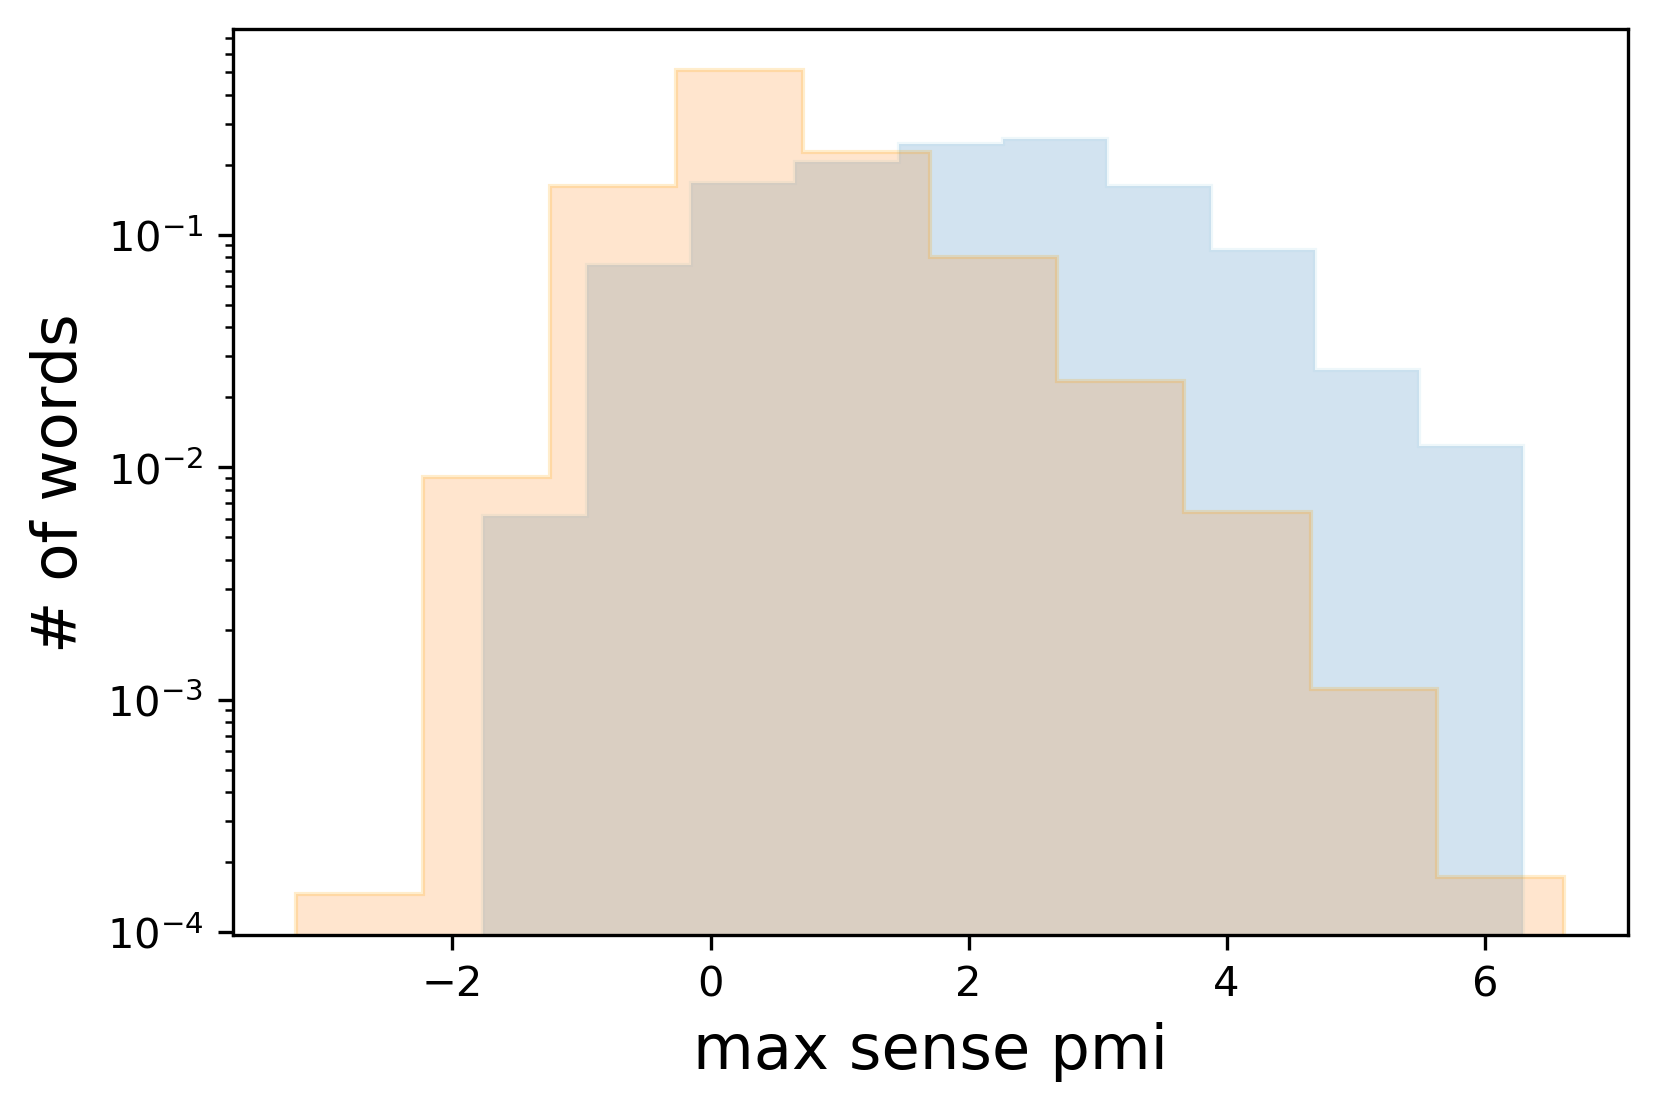

In [136]:
# sense_pmi of most common sense of a word
BASE_MOST_PMI = LOG_DIR + 'base_most_sense_pmi/'
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_MOST_PMI))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(BASE_MOST_PMI + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['most_pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

### Compare most_pmi with max_pmi for BERT embeddings

In [137]:
# compare most_pmi with max_pmi
BASE_MAX_PMI = LOG_DIR + 'base_max_sense_pmi/'
x = []
y = []
words = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_MOST_PMI))): 
    subreddit = filename.replace('.csv', '')
    df1 = pd.read_csv(BASE_MAX_PMI + filename, encoding='utf-8').fillna('')
    df2 = pd.read_csv(BASE_MOST_PMI + filename, encoding='utf-8').fillna('')
    assert(len(df1) == len(df2))
    df3 = pd.merge(df1, df2, on='word')
    words.extend(df3['word'].tolist())
    x.extend(df3['max_pmi'].tolist())
    y.extend(df3['most_pmi'].tolist())
print("Pearson r:", pearsonr(x, y))

 24%|██▍       | 115/474 [00:03<00:10, 35.69it/s]


KeyboardInterrupt: 

## Substitute PMI

In [ ]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

In [ ]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

In [ ]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

In [ ]:
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_max_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_max_sense_pmi/'
x = []
y = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    df1 = pd.read_csv(AG_SENSE_PMI_DIR + filename)
    df2 = pd.read_csv(BASE_SENSE_PMI_DIR + filename)
    assert(len(df1) == len(df2))
    df3 = pd.merge(df1, df2, on='word')
    x.extend(df3['max_pmi_x'].tolist())
    y.extend(df3['max_pmi_y'].tolist())
print("Pearson r:", pearsonr(x, y))
plt.scatter(x, y, alpha=0.5, marker = '.')
plt.xlabel("Substitute")
plt.ylabel("Embedding")
plt.show()

### Sense PMI of most common sense of a word in a subreddit

In [ ]:
# sense_pmi of most common sense of a word
AG_MOST_PMI = LOG_DIR + 'ag_most_sense_pmi/'
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_MOST_PMI))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(AG_MOST_PMI + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['most_pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

In [ ]:
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_most_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_most_sense_pmi/'
x = []
y = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    df1 = pd.read_csv(AG_SENSE_PMI_DIR + filename)
    df2 = pd.read_csv(BASE_SENSE_PMI_DIR + filename)
    assert(len(df1) == len(df2))
    df3 = pd.merge(df1, df2, on='word')
    x.extend(df3['most_pmi_x'].tolist())
    y.extend(df3['most_pmi_y'].tolist())
print("Pearson r:", pearsonr(x, y))
plt.scatter(x, y, alpha=0.5, marker = '.')
plt.xlabel("Substitute")
plt.ylabel("Embedding")
plt.show()

## Type PMI

In [ ]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)

In [ ]:
print(len(gloss_vals))
print(len(not_gloss_vals))

In [ ]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability density', fontsize=15)
plt.xlabel('type pmi', fontsize=15)
plt.legend()

In [ ]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

In [ ]:
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

In [ ]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms and score < 0.05 and int(row['count']) > 100: 
                print(subreddit, w, score)
            #elif w not in gloss_terms and score > 0.85 and int(row['count']) > 100: 
            #    print(subreddit, w, score)

## TFIDF

In [ ]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TFIDF_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TFIDF_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['tfidf'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)

In [ ]:
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

In [ ]:
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

## Finetuned vs. BERT-base

In [ ]:
SENSE_PMI_DIR = LOG_DIR + 'ft_max_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_max_sense_pmi/'

In [ ]:
diff = Counter()
for filename in tqdm.tqdm(sorted(os.listdir(BASE_SENSE_PMI_DIR))):
    subreddit = filename.replace('.csv', '')
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score_ft = defaultdict(float)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['max_pmi'])
            w2score_ft[w] = score
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score_base = defaultdict(float)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['max_pmi'])
            w2score_base[w] = score
    for w in sorted(w2score_ft.keys()): 
        diff[(subreddit, w)] = w2score_base[w] - w2score_ft[w]
mc = diff.most_common()
print("BERT-base much higher:", mc[:30])
print("Finetuned much higher:", mc[-30:])
print("Average difference:", np.mean(np.abs(list(diff.values()))), np.var(np.abs(list(diff.values()))))

In [ ]:
print("\x1b[31m BERT-base higher \x1b[0m")
print("\x1b[32m Finetuned higher \x1b[0m")
print()
for sr in sr2terms: 
    for w in sr2terms[sr]: 
        difference = diff[(sr, w)]
        if difference > 0.5: 
            print("\x1b[31m", w, sr, difference, "\x1b[0m")
        elif difference <= -0.5:
            print("\x1b[32m", w, sr, difference, "\x1b[0m")

## Top 1/2 and 1/4 cutoffs

In [ ]:
ROOT = '/mnt/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
SENSE_PMI_DIR = LOG_DIR + 'ft_max_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_most_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_most_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'
TFIDF_DIR = LOG_DIR + 'tfidf/'

In [ ]:
def get_medians(path, metric): 
    print(metric)
    vals = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '')
        with open(path + filename, 'r') as infile: 
            reader = csv.DictReader(infile)
            for row in reader: 
                w = row['word']
                score = float(row[metric])
                vals.append(score)
    ps = []
    for p in [50, 60, 70, 80, 90, 98, 99]: 
        ps.append(np.percentile(vals, p))
    print(ps)
    return np.percentile(vals, 50), np.percentile(vals, 98)

In [ ]:
sense_m, sense_t = get_medians(AG_SENSE_PMI_DIR, 'most_pmi')
base_m, base_t = get_medians(BASE_SENSE_PMI_DIR, 'most_pmi')
type_m, type_t = get_medians(TYPE_PMI_DIR, 'pmi')
tfidf_m, tfidf_t = get_medians(TFIDF_DIR, 'tfidf')

In [ ]:
def get_glossary_percentage(cutoff, path, metric): 
    '''
    Gets the percentage of glossary words in the cutoff percentile
    '''
    total_count = 0
    recall_count = 0
    recall_set = set()
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '').replace('_0.2', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            reader = csv.DictReader(infile)
            for row in reader: 
                w = row['word'] 
                score = float(row[metric])
                if w in gloss_terms: 
                    if score >= cutoff: 
                        recall_count += 1
                        recall_set.add((subreddit, w))
                    total_count += 1
    return recall_count / total_count, recall_set

In [ ]:
percent, sense_set = get_glossary_percentage(sense_t, AG_SENSE_PMI_DIR, 'most_pmi')
print(percent)
percent, sense_set, = get_glossary_percentage(base_t, BASE_SENSE_PMI_DIR, 'most_pmi')
print(percent)
percent, type_set = get_glossary_percentage(type_t, TYPE_PMI_DIR, 'pmi')
print(percent)
percent, _ = get_glossary_percentage(tfidf_t, TFIDF_DIR, 'tfidf')
print(percent)

In [ ]:
sense_set & type_set

In [ ]:
# total possible recall of glossary words
total_count = 0
recall_count = 0
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '').replace('_0.2', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word'] 
            score = float(row['pmi'])
            if w in gloss_terms: 
                recall_count += 1
    total_count += len(gloss_terms)
print(recall_count / total_count)

### MWE vs single-token scores

In [ ]:
'''
single_vals = []
mwe_vals = []
gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                if len(w.split()) > 1: 
                    mwe_vals.append(score)
                else: 
                    single_vals.append(score)
'''

In [ ]:
'''
plt.hist(mwe_vals, label="non-glossary MWEs", alpha=0.2, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(single_vals, label="non-glossary non-MWEs", alpha=0.2, edgecolor='orange', histtype= "stepfilled")
plt.hist(gloss_vals, label="glossary words", alpha=0.2, edgecolor='green', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('type PMI', fontsize=15)
plt.title("all words in subreddits w/ glossaries")
plt.legend()
'''

In [ ]:
'''
single_vals = []
mwe_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                if len(w.split()) > 1: 
                    mwe_vals.append(score)
                else: 
                    single_vals.append(score)
'''

In [ ]:
'''
plt.hist(mwe_vals, label="MWE", alpha=0.2, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(single_vals, label="non-MWE", alpha=0.2, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('type PMI', fontsize=15)
plt.title("only glossary words")
plt.legend()
'''

### Mean reciprocal rank

In [ ]:
# highest is first
def rank_highest_first(path): 
    inv_ranks = []
    ranks = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            w2score = defaultdict(list)
            reader = csv.DictReader(infile)
            i = 0
            found = False
            for row in reader: 
                i += 1
                w = row['word']
                score = float(row['most_pmi'])
                if w in gloss_terms: 
                    rr = 1/float(i)
                    ranks.append(i)
                    found = True
                    inv_ranks.append(rr)
                    break
            if not found: 
                inv_ranks.append(0)
    print("Number of values:",len(inv_ranks))
    print("Mean reciprocal rank:",np.mean(inv_ranks))
    print("Highest-scored glossary term's median rank:",np.median(ranks))

In [ ]:
rank_highest_first(AG_SENSE_PMI_DIR)
rank_highest_first(BASE_SENSE_PMI_DIR)

In [ ]:
# lowest is first
def rank_lowest_first(path, metric): 
    """
    The input file is formatted so that the lower values
    are listed in the file first. 
    """
    inv_ranks = []
    ranks = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))):
        subreddit = filename.replace('_0.2.csv', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            w2score = defaultdict(list)
            reader = csv.DictReader(infile)
            i = 0
            top = 0
            last_w = ''
            for row in reader: 
                i += 1
                w = row['word']
                score = float(row[metric])
                if w in gloss_terms: 
                    last_w = w
                    top = i
            if top == 0: 
                inv_ranks.append(0)
            rank = i - top + 1
            inv_ranks.append(1/float(rank))
            ranks.append(rank)
    print("Number of values:", len(inv_ranks))
    print("Mean reciprocal rank:", np.mean(inv_ranks))
    print("Highest-scored glossary term's median rank:", np.median(ranks))

In [ ]:
rank_lowest_first(TYPE_PMI_DIR, 'pmi')
rank_lowest_first(TFIDF_DIR, 'tfidf')